In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditdata = pd.read_csv(r'Marketing_data.csv')

In [3]:
creditdata

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


CUSTID: Identification of Credit Card holder 

BALANCE: Balance amount left in customer's account to make purchases

BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES: Amount of purchases made from account

ONEOFFPURCHASES: Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES: Amount of purchase done in installment CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"

PURCHASES_TRX: Number of purchase transactions made

CREDIT_LIMIT: Limit of Credit Card for user

PAYMENTS: Amount of Payment done by user

MINIMUM_PAYMENTS: Minimum amount of payments made by user  

PRC_FULL_PAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user

In [4]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
creditdata.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Balance has a high std deviation or variance , can be seen from the min to max value variations

Balance frequency mean is 0.87. Avg of More than 85 percent of the population updates their balance.

Purchases are similar to balance as well. Similar trends for one off , installment purchases and cash advance. 

Purchase freq avg is ~ 50% more or less purchase freq exhibits similar behaviour.

20% of population on an avg frequently do one off purchases.

Close to 40% of them on an avg prefer purchases in installments.

Only 13% avg of the population frequently take cash advance.

On an avg there are oly 3 cash advance transactions and 14 purchase transactions.

Credit limit on an avg is ~ 4.5k with a min of 50 and max 30k. 

Min payments range from 0.01 to 76k , with an avg payment of 864.

15% on an avg of the population makes full payment of which 14% represents 75 percent of the payment.

Min tenure plan is 6 years and max is 12 years.















In [6]:
creditdata.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
creditdata[creditdata['ONEOFF_PURCHASES'] == max(creditdata['ONEOFF_PURCHASES'])]
 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


The customer that did the maximum purchase value. Strong balance & purchase & one off purchase freq. Close to 41k as one of payment and remaining in installments.  There was only one cash advance transaction and 90 percent of them in purchase installments. Very high credit limit of 22.5k with minimum payment close to 3k and 25 percent of transactions are full payment. 

In [8]:
creditdata[creditdata['CASH_ADVANCE'] == max(creditdata['CASH_ADVANCE'])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


The customer that has taken maximum cash advance has a balance close to 11k with a strong balance freq. Purchase value around 430 of which close to 300 is made on installment purchases and the remaining in one off purchases.That explains the 25 percent one of purchase freq and 50 percent purchase installment freq. Their cash advance freq is too high with almost 123 transactions in cash advance. They have 21 purchase transactions which is not much with a credit limit of 19.6 k . Payments are close to 40k with min payment made being close to 6k.Never doen any transactions on full payment and tenure is 12 years. 

In [9]:
creditdata['CREDIT_LIMIT'].isnull() 

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Name: CREDIT_LIMIT, Length: 8950, dtype: bool

In [10]:
creditdata[creditdata['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [11]:
creditdata['CREDIT_LIMIT'].fillna(creditdata['CREDIT_LIMIT'].mean() , inplace = True)

In [12]:
creditdata['MINIMUM_PAYMENTS'].fillna(creditdata['MINIMUM_PAYMENTS'].mean() , inplace = True)

In [13]:
creditdata.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
creditdata.duplicated().sum()

0

In [15]:
credit = creditdata.iloc[:,1:]

In [16]:
credit

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

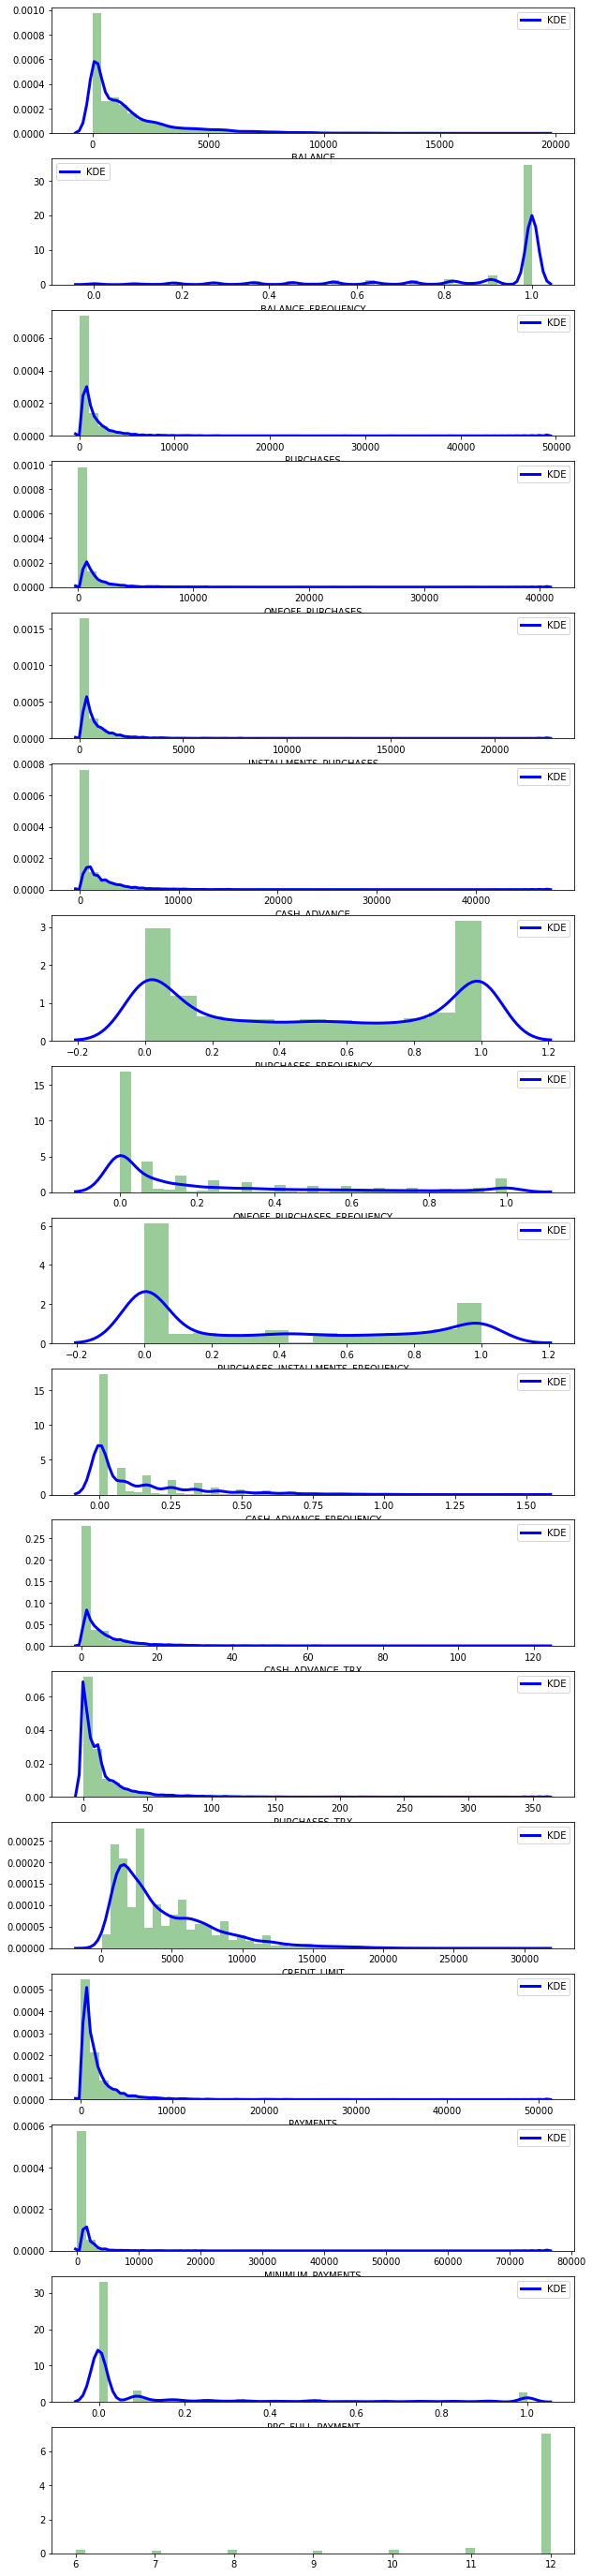

In [17]:
plt.figure(figsize=(10,50))
for i in range(len(credit.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(credit[credit.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})


plt.tight_layout()
# Most customers have a balance of around 1000. (also seen at mean value 1500)
#Most customers update their balance regularly.
# purchases,cash advance and one off purchases & installment purchases show similar trends as balance.
# purchase frequency is almost equally distributed across 0 and 1.
# Majority of them do not purchase one off frequently.
# Purchase installments frequency is slightly less preferred.
# cash advance frquency is less preferred with their transcations lyin between 0 to 20 with most of them being 0.
# credit limits mostly lie between 0 to 5000.
# most payments are less than 5000.
# majority of them do not do full payment.
# Most of them are in a 12 year tenure.





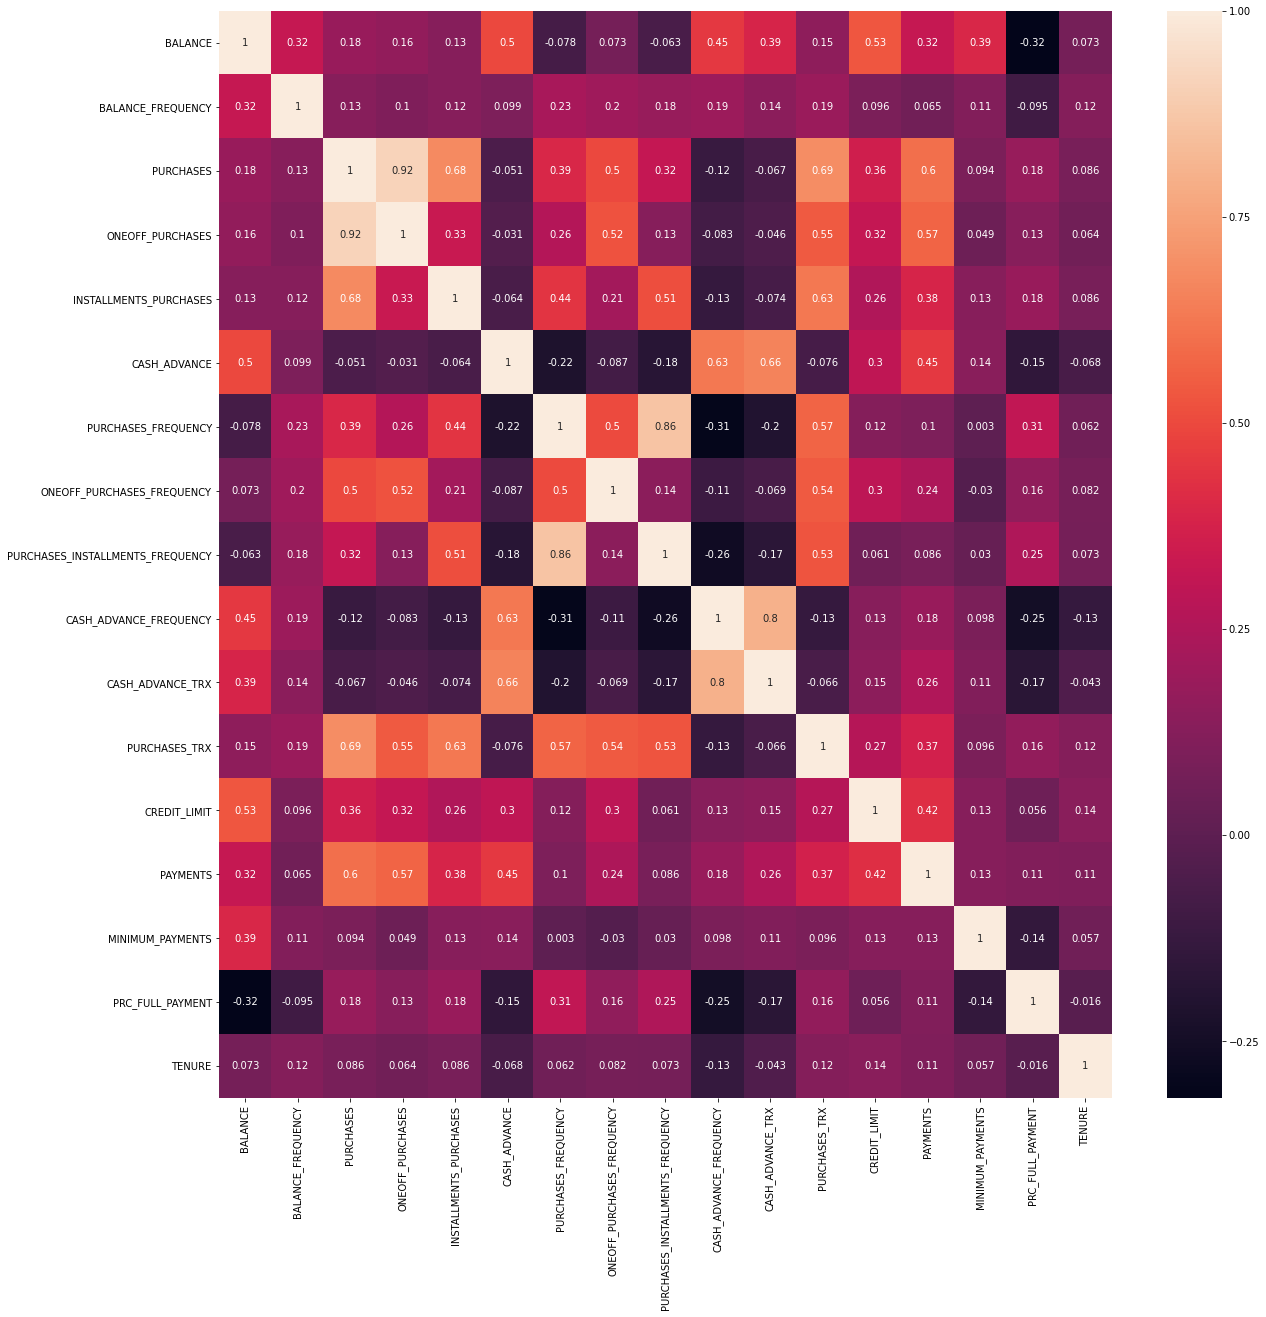

In [19]:
plt.figure(figsize=(20,20))
coo = credit.corr()
sns.heatmap(coo,annot=True)


Purchases have a strong coorelation to one off purchases and instalment purchases. Purchase installment frquency and purchase frequency as well share strong coorelation.

Payments & purchases , purchase trx and purchases, cash adv to cash adv freq & transactions also exhibit coorelation strongly.


In [20]:
sc = StandardScaler()


In [21]:
credit_scaled = sc.fit_transform(credit)
credit_scaled.shape

(8950, 17)

In [22]:
credit_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [23]:
score = []
rangeval = range(1,20)


for i in rangeval:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(credit_scaled)
    score.append(kmeans.inertia_)

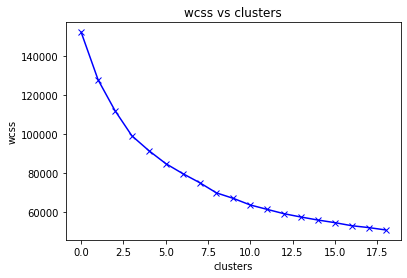

In [24]:
plt.plot(score,"bx-")
plt.title("wcss vs clusters")
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()
#using elbow method cluster score seems optimal at 8

In [25]:
kmeans = KMeans(8)
kmeans.fit(credit_scaled)
labels=kmeans.labels_

In [26]:
labels

array([4, 3, 2, ..., 6, 6, 6])

In [27]:
kmeans.cluster_centers_.shape

(8, 17)

In [28]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns=[credit.columns])

In [29]:
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.364675,0.333430,-0.037084,-0.244240,0.360838,-0.363568,0.991629,-0.386928,1.206940,-0.475246,-0.361111,0.188020,-0.260435,-0.216561,-0.032442,0.314683,0.257535
1,-0.701229,-2.144116,-0.311099,-0.235720,-0.302414,-0.321905,-0.556586,-0.444989,-0.439730,-0.520844,-0.376103,-0.419790,-0.177161,-0.202048,-0.256658,0.281550,0.199199
2,-0.165253,0.392196,0.453349,0.593167,-0.017967,-0.333914,0.943302,1.878357,0.089014,-0.407665,-0.323378,0.523732,0.373578,0.086557,-0.162605,0.406347,0.261047
3,1.698325,0.393098,-0.215463,-0.154529,-0.225632,2.025668,-0.471452,-0.210500,-0.409161,1.920837,1.941432,-0.263115,1.040171,0.828342,0.557352,-0.392330,0.071341
4,0.019135,0.403238,-0.361845,-0.247042,-0.401605,-0.086839,-0.866849,-0.410607,-0.757865,0.115204,-0.020981,-0.486628,-0.305456,-0.248386,-0.008590,-0.456525,0.271866
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
6,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
7,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182


In [30]:
cluster_centers = sc.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers,columns=[credit.columns])

In [31]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,805.434029,0.956257,923.973297,187.048203,737.368630,216.451679,0.888339,0.087030,0.844106,0.040043,0.784508,19.383317,3546.881928,1106.220084,788.601343,0.245754,11.861966
1,104.925267,0.369349,338.537483,201.190254,137.598754,303.821813,0.266966,0.069709,0.189677,0.030918,0.682203,4.275424,3849.863936,1148.234177,266.075424,0.236063,11.783898
2,1220.514994,0.970178,1971.792676,1576.972447,394.820228,278.637458,0.868943,0.762808,0.399814,0.053566,1.042009,27.727854,5853.677875,1983.717894,485.262318,0.272564,11.866667
3,5099.393953,0.970392,542.864477,335.950907,207.031791,5226.790667,0.301134,0.139661,0.201826,0.519523,16.497674,8.169767,8279.016913,4131.114001,2163.092995,0.038965,11.612791
4,1604.302726,0.972794,230.117781,182.398265,47.901056,796.765070,0.142442,0.079966,0.063242,0.158198,3.105649,2.614087,3383.076547,1014.090763,844.187585,0.020189,11.881145
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
7,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539


Cluster 0 with the highest balance and purchases also with the maximum full payment percentage and one of purchase frequency. Cash advance frequency is very less for this group with the highest tenure as well close to 12 years. Ideally the biggest cluster in the group and the biggest purchasers.

Cluster 1 has a decent balance frequency but one of the least in terms of purchases.Their purcahse freq is 40 % with very low one off purchases and installment freq and cash adv freq with the lowest credit limit and tenure as well. Not a very strong user.

Cluster 2 has a high balance freq , purchase freq and also installment purchaser by more than 80%.  However their cash advance and one off purchase strengths are very low.

Cluster 3 and 4 are decent performer in terms of purchase, one of purchase and installments noted by their frequqnecy levels with also high purchase and balance scores. Cash advance levels are very low for them with decent credit limits and full payment percent.

Cluster 5 has a very strong balance frequency however their purchase scores are very low but a very high cash advance scores with very high credit limits and  but lowest full payment percentages.

Cluster 6 and 7 has one of the lowest overall scores in all levels and not a strong performer.




In [32]:
cluster_centers.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2338.532512,0.872399,4400.690505,3051.625604,1349.426849,1296.531289,0.592824,0.338046,0.447508,0.144396,3.854470,37.384936,6489.456807,5078.381881,1286.568377,0.211577,11.266780
std,2089.517430,0.212421,8515.561626,6225.942178,2316.984340,1680.177574,0.343078,0.332528,0.321021,0.162375,5.242929,52.119610,4377.293076,8302.215833,1126.369296,0.144904,1.634722
min,104.925267,0.369349,230.117781,182.398265,47.901056,216.451679,0.142442,0.069709,0.063242,0.030918,0.682203,2.614087,2430.891398,596.373827,266.075424,0.020189,7.229904
25%,850.120491,0.915956,373.520661,197.654741,148.164234,297.525724,0.292592,0.085264,0.198789,0.050185,0.977634,4.865882,3505.930582,1083.187754,458.147470,0.128101,11.741121
50%,1412.408860,0.963726,733.418887,284.964441,300.926010,682.819574,0.638894,0.128003,0.337505,0.078003,2.453534,13.776542,4851.770905,1565.976035,816.394464,0.239460,11.864316
75%,3855.996728,0.970993,2942.632409,2059.877113,1140.021206,1306.259857,0.893893,0.696924,0.776860,0.167876,3.358387,41.757474,8459.824151,4465.440904,1960.871961,0.252456,11.894192
max,5567.142164,0.987896,24957.905000,18186.875667,6771.029333,5226.790667,0.955365,0.773889,0.851760,0.519523,16.497674,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.964539


In [33]:
labels.shape

(8950,)

In [34]:
credit_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [35]:
creditcluster_df = pd.concat([credit,pd.DataFrame({'cluster':labels})],axis=1) 

In [36]:
creditcluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


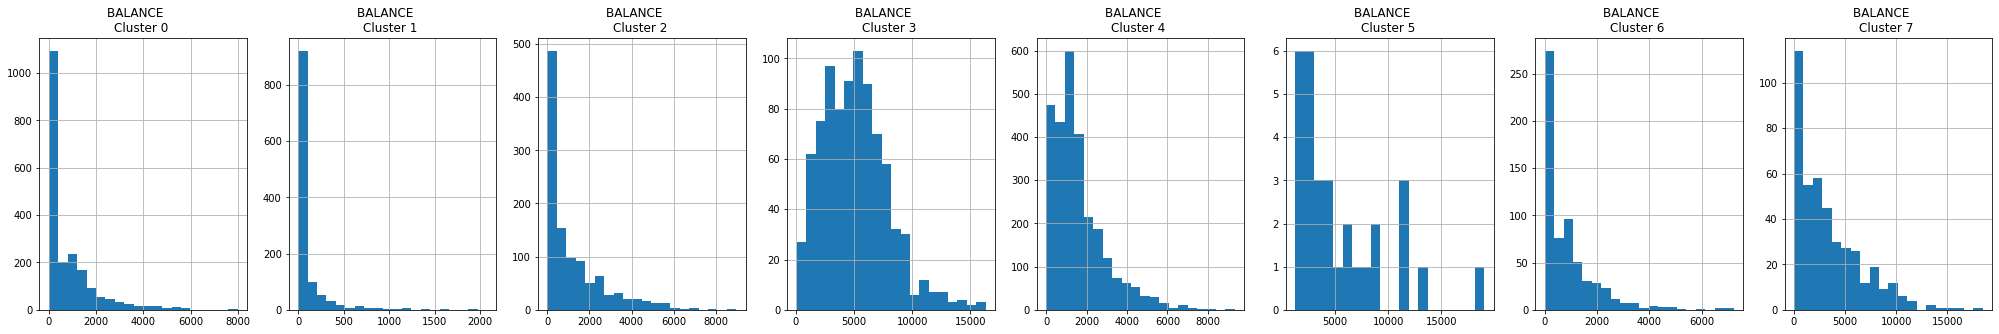

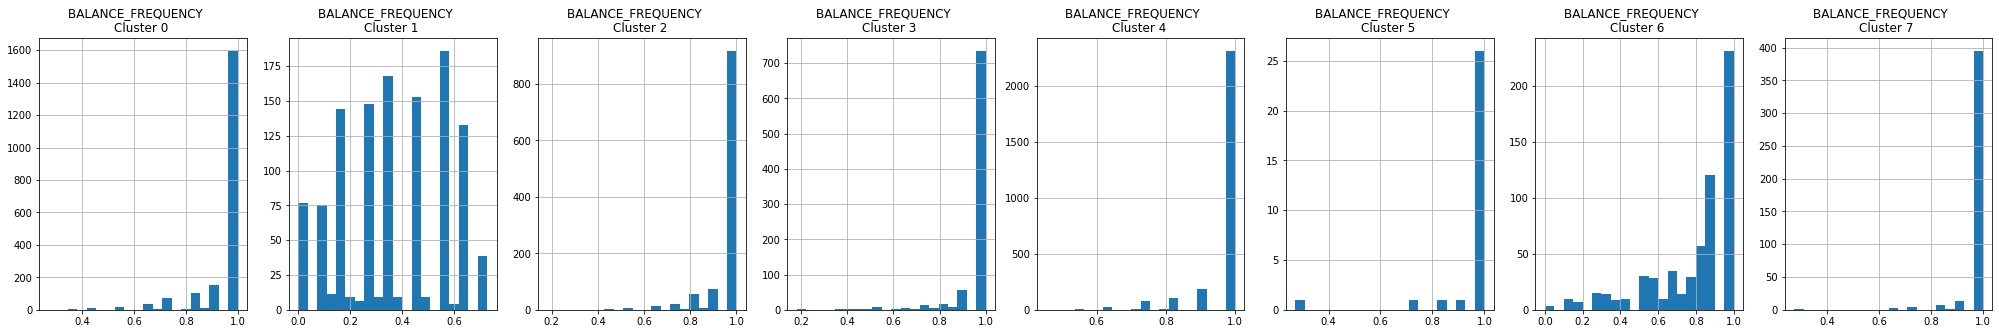

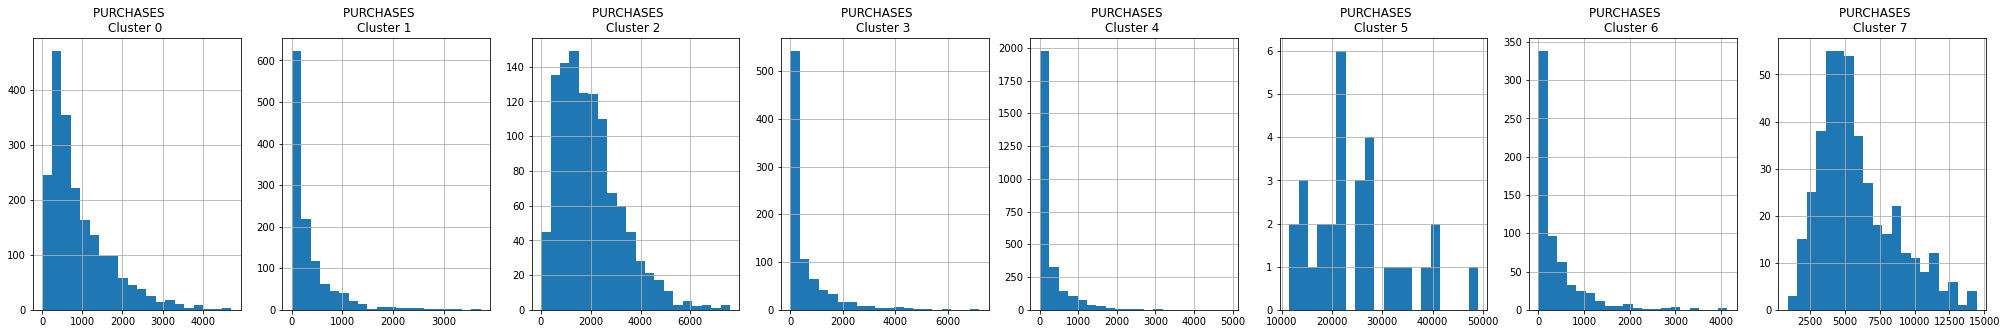

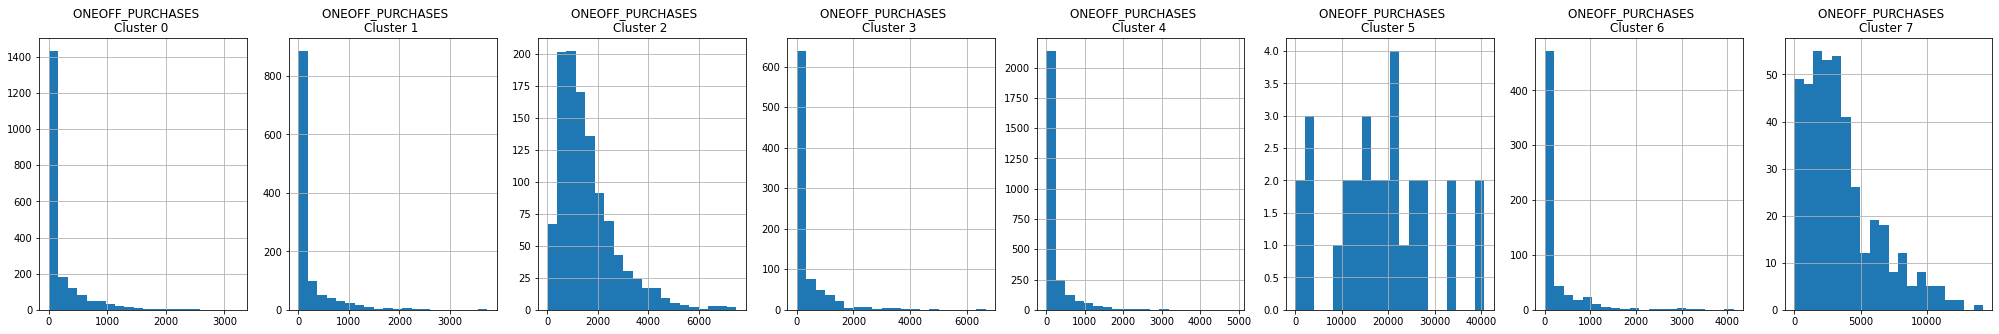

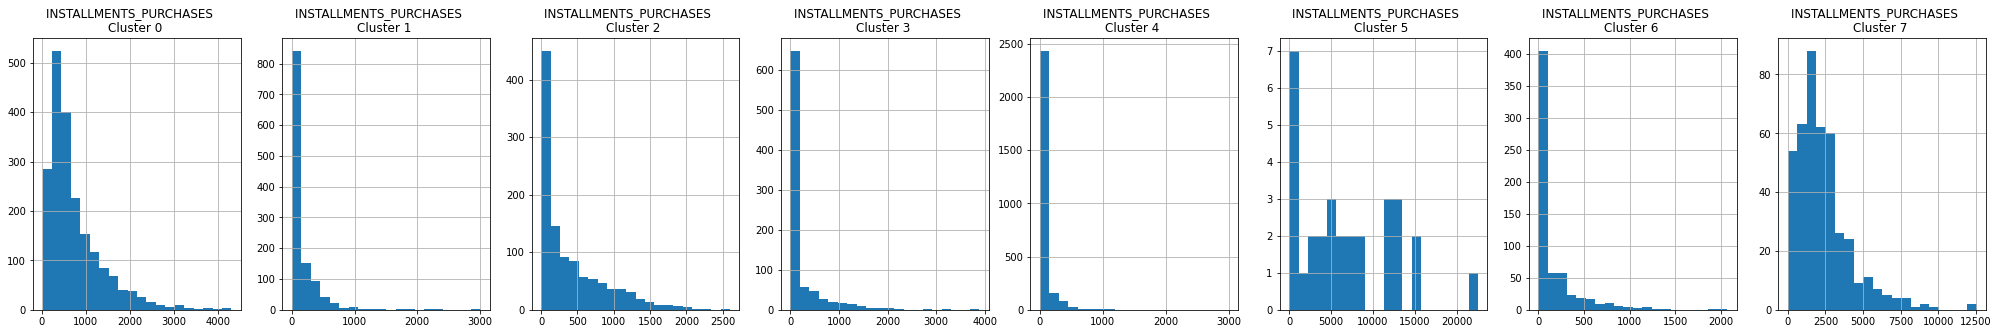

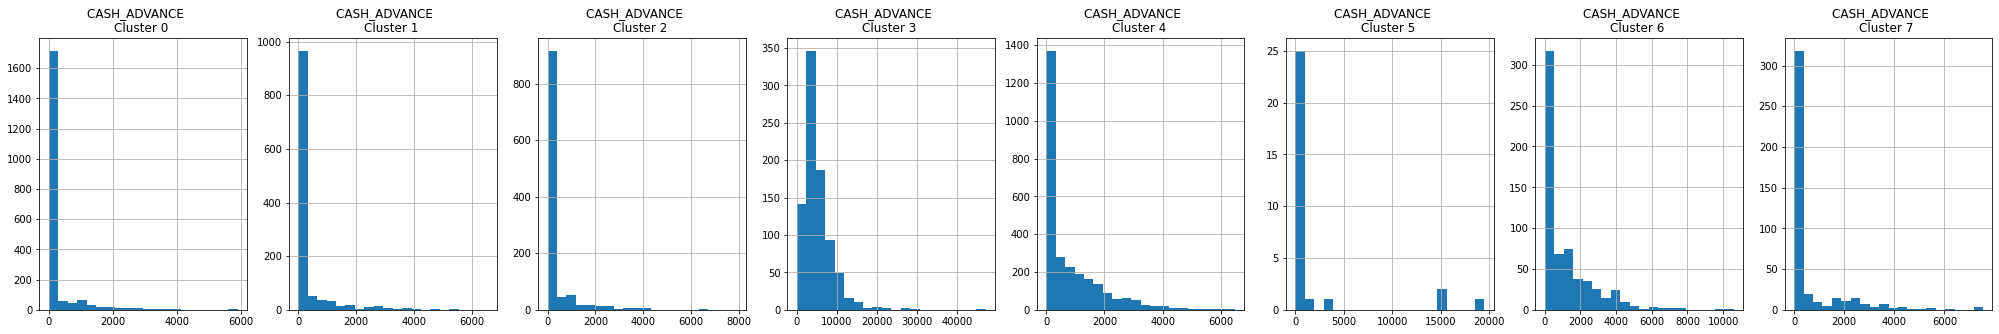

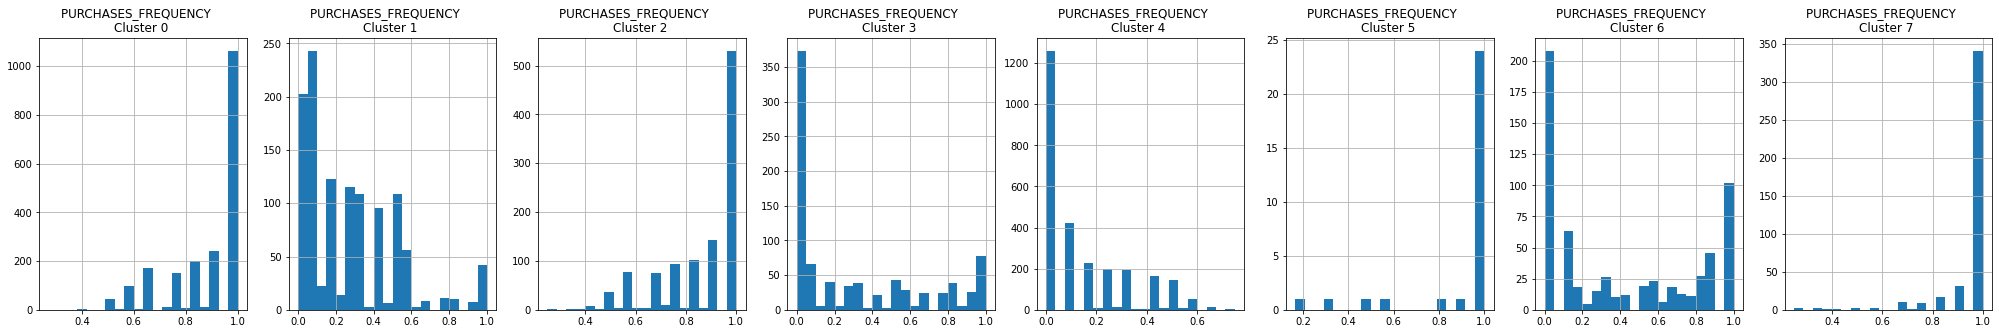

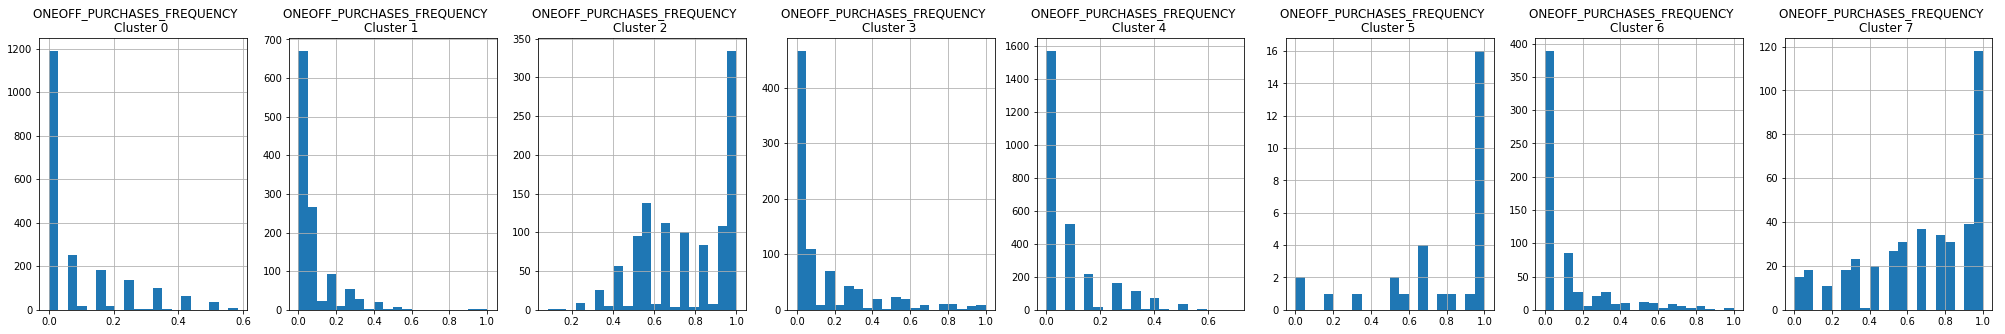

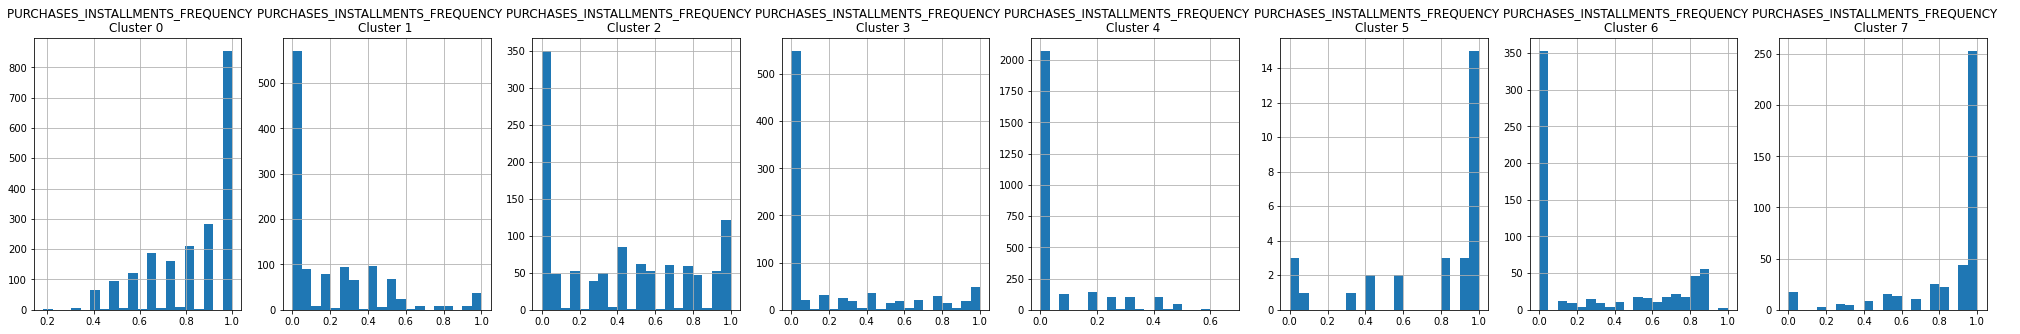

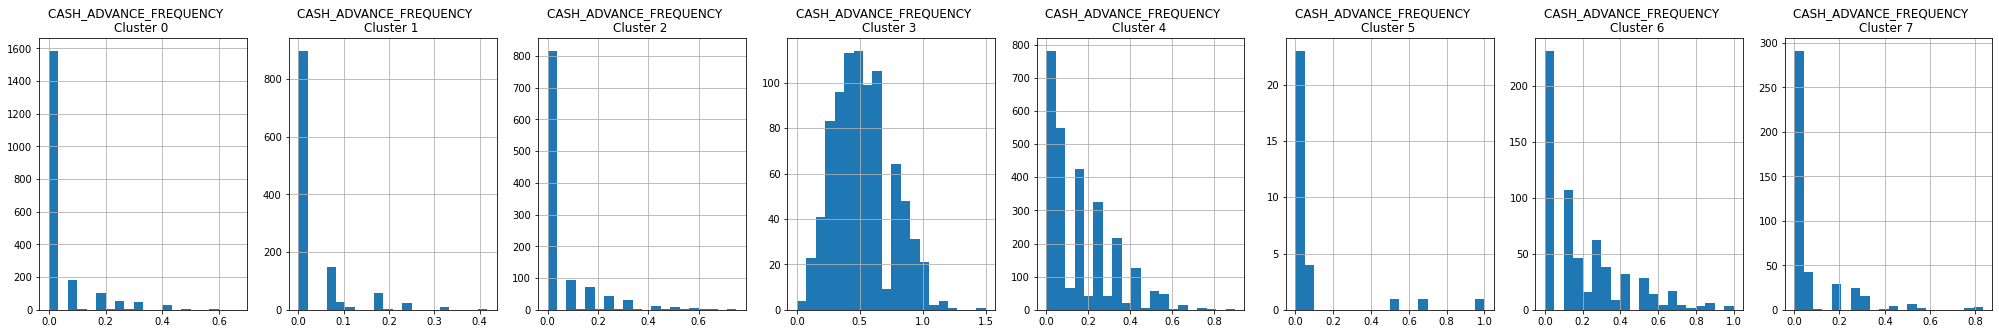

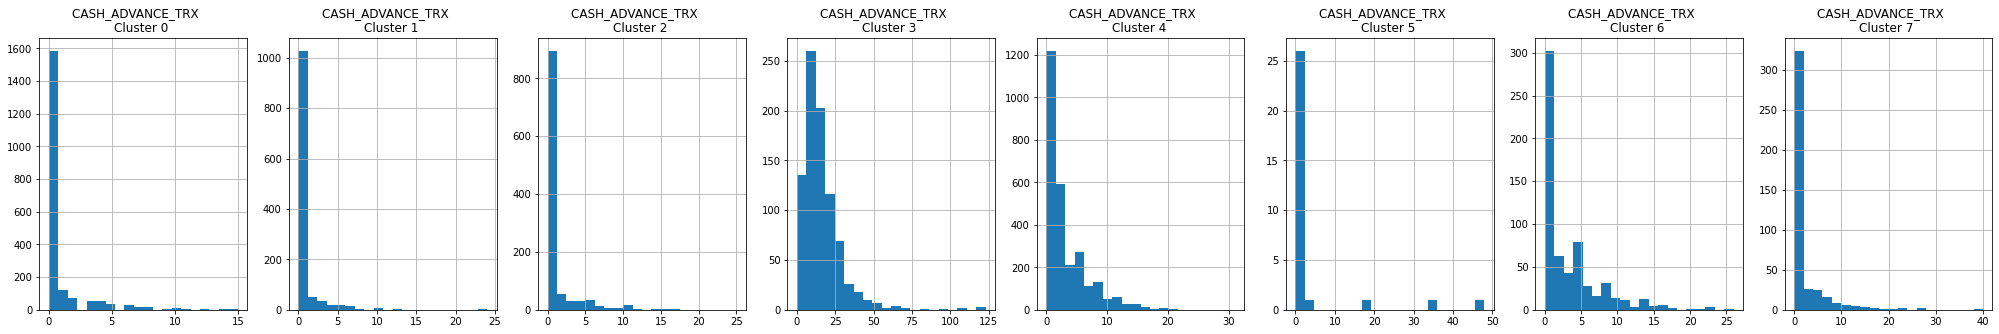

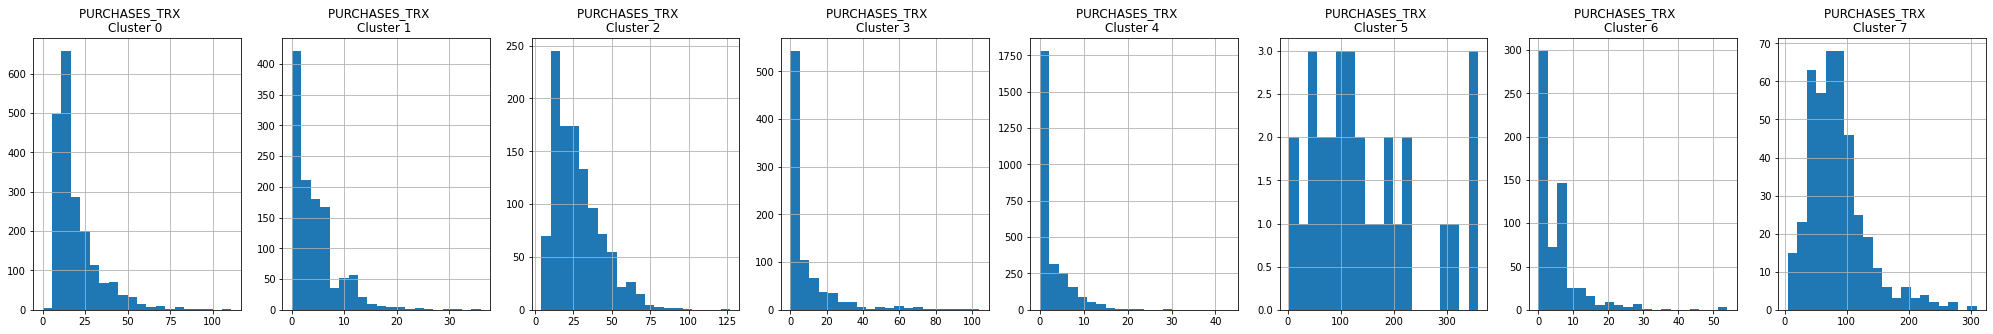

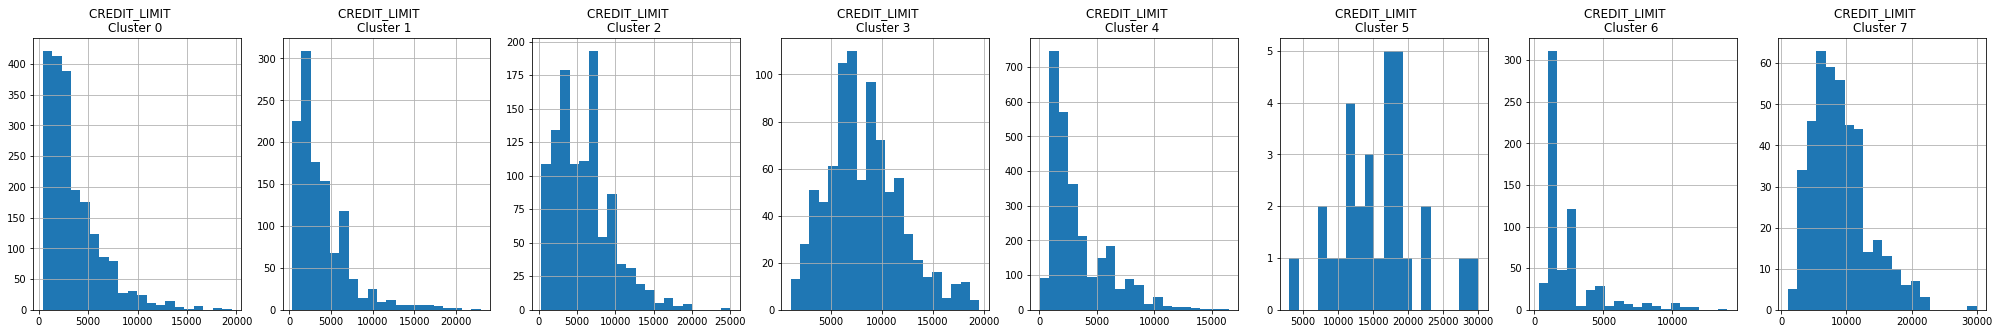

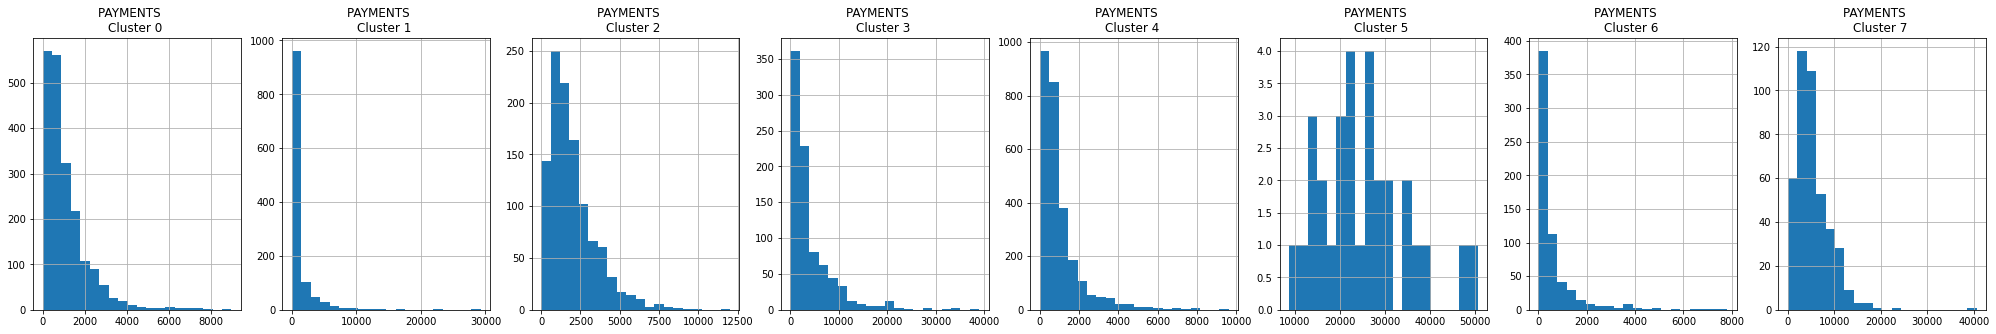

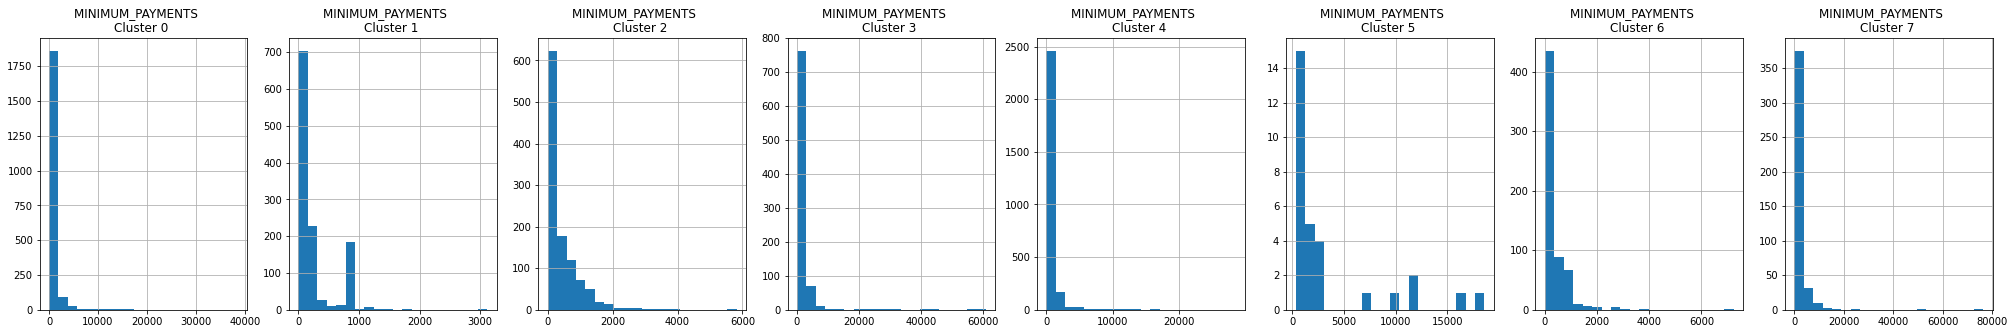

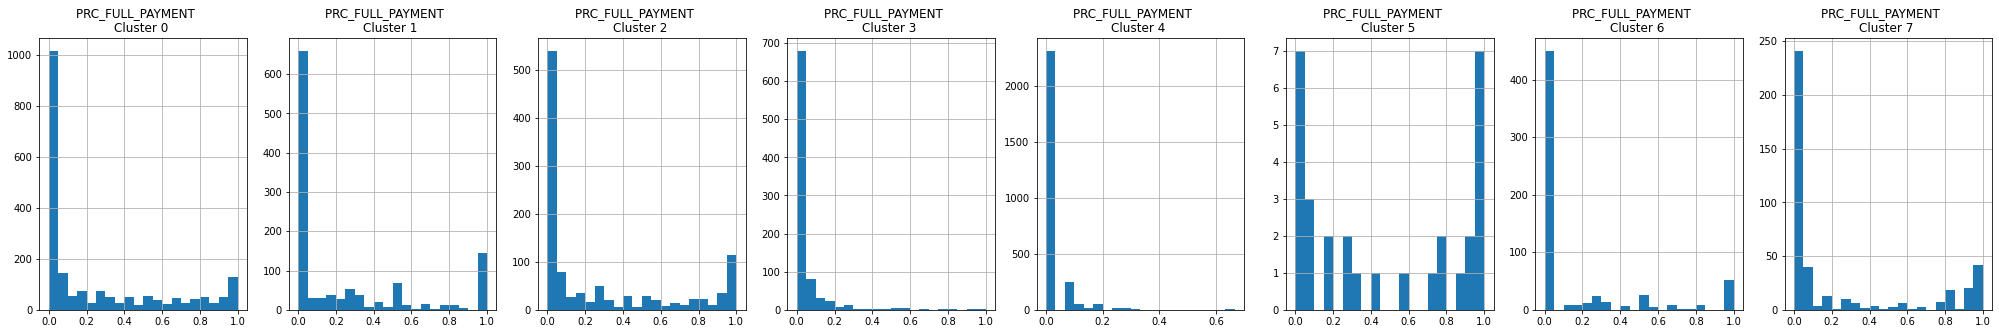

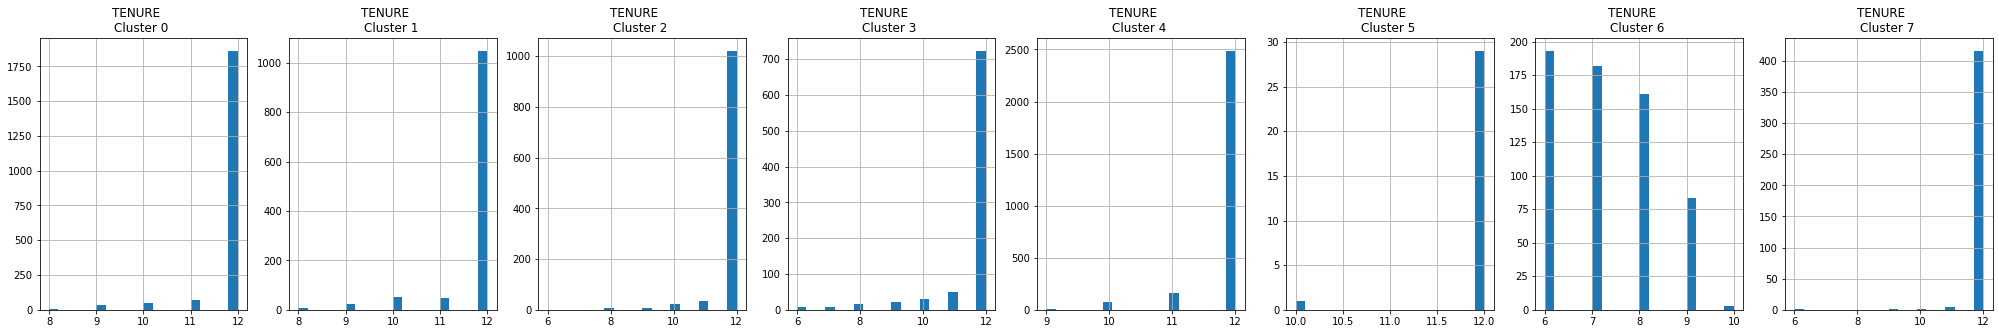

In [37]:
for i in credit.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcluster_df[creditcluster_df['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [38]:
#using PCA for dimensionality reduction.
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(credit_scaled)
principal_comp

array([[-1.6822206 , -1.07645232],
       [-1.13829721,  2.50646744],
       [ 0.96968358, -0.38352376],
       ...,
       [-0.92620304, -1.8107836 ],
       [-2.3365504 , -0.65796024],
       [-0.55642111, -0.40046173]])

In [39]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])

In [40]:
pca_df

,pca1,pca2
0,-1.682221,-1.076452
1,-1.138297,2.506467
2,0.969684,-0.383524
3,-0.873629,0.043162
4,-1.599434,-0.688581
...,...,...
8945,-0.359629,-2.016144
8946,-0.564368,-1.639118
8947,-0.926203,-1.810784
8948,-2.336550,-0.657960


In [41]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis =1)
pca_df

,pca1,pca2,cluster
0,-1.682221,-1.076452,4
1,-1.138297,2.506467,3
2,0.969684,-0.383524,2
3,-0.873629,0.043162,4
4,-1.599434,-0.688581,4
...,...,...,...
8945,-0.359629,-2.016144,6
8946,-0.564368,-1.639118,6
8947,-0.926203,-1.810784,6
8948,-2.336550,-0.657960,6


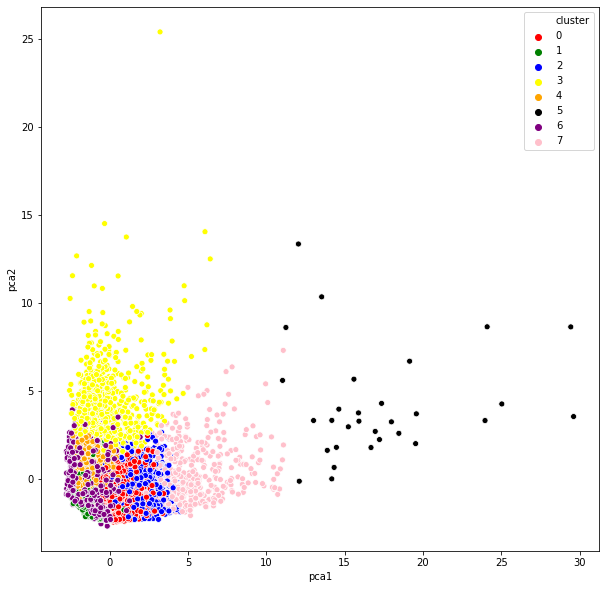

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1',y='pca2',hue ='cluster',data=pca_df,palette=['red','green','blue','yellow','orange','black','purple','pink'] )

### Using Auto encoders for clustering

In [43]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD



Using TensorFlow backend.


In [44]:
encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [45]:
autoencoder.fit(credit_scaled, credit_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Train on 8950 samples
Epoch 1/25
8950/8950 [==============================] - 2s 227us/sample - loss: 0.6506
Epoch 2/25
8950/8950 [==============================] - 2s 174us/sample - loss: 0.3177
Epoch 3/25
8950/8950 [==============================] - 2s 173us/sample - loss: 0.2356
Epoch 4/25
8950/8950 [==============================] - 2s 173us/sample - loss: 0.2015
Epoch 5/25
8950/8950 [==============================] - 2s 174us/sample - loss: 0.1933
Epoch 6/25
8950/8950 [==============================] - 2s 175us/sample - loss: 0.1564
Epoch 7/25
8950/8950 [==============================] - 2s 175us/sample - loss: 0.1414
Epoch 8/25
8950/8950 [==============================] - 2s 176us/sample - loss: 0.1318
Epoch 9/25
8950/8950 [==============================] - 2s 175us/sample - loss: 0.1200
Epoch 10/25
8950/8950 [==============================] - 2s 176us/sample - loss: 0.1112
Epoch 11/25
8950/8950 [==============================] - 2s 174us/sample - loss: 0.1035
Epoch 12/25
8950/89

In [46]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

In [47]:
pred = encoder.predict(credit_scaled)

In [48]:
pred.shape

(8950, 10)

In [49]:
score_pred=[]
for i in rangeval:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    score_pred.append(kmeans.inertia_)

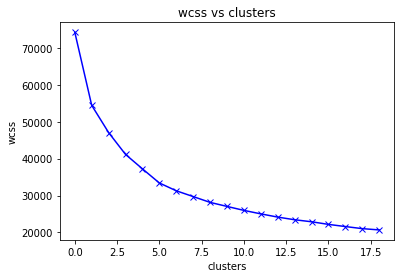

In [50]:
plt.plot(score_pred,"bx-")
plt.title("wcss vs clusters")
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()
#Applying elbow method , we see that 4 could be the optimal number

In [51]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels=kmeans.labels_

In [52]:
kmeans.cluster_centers_.shape

(4, 10)

In [53]:
creditcluster_pd = pd.concat([credit,pd.DataFrame({'cluster':labels})],axis=1) 

In [54]:
creditcluster_pd

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


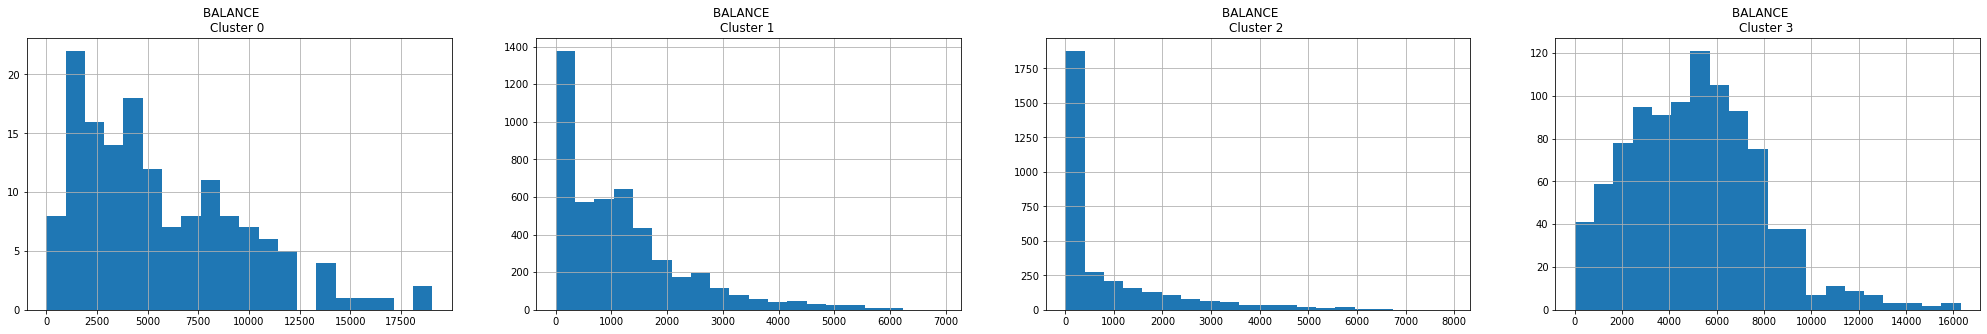

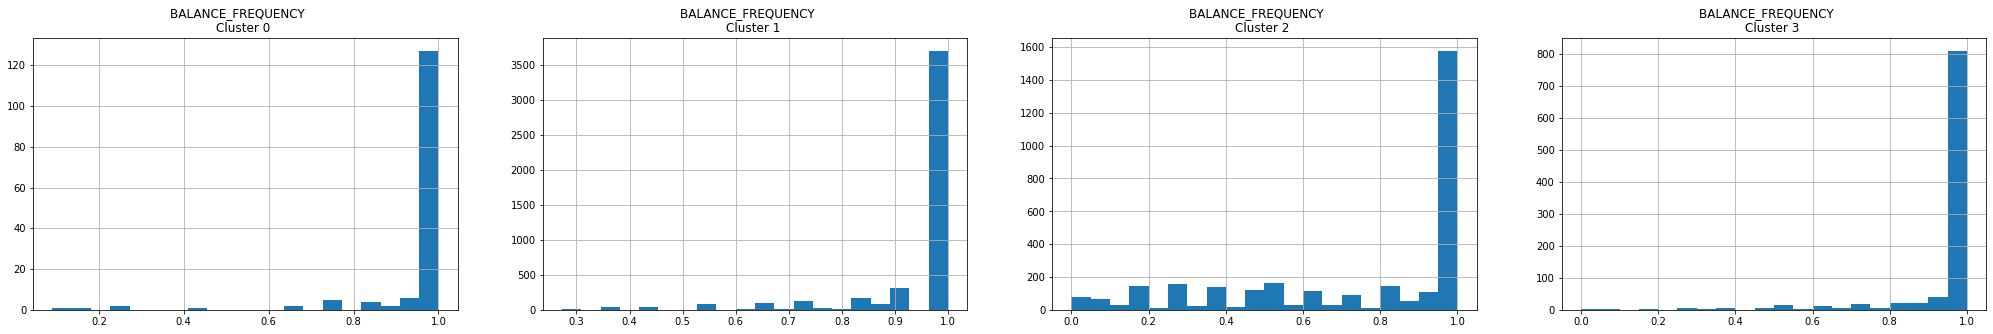

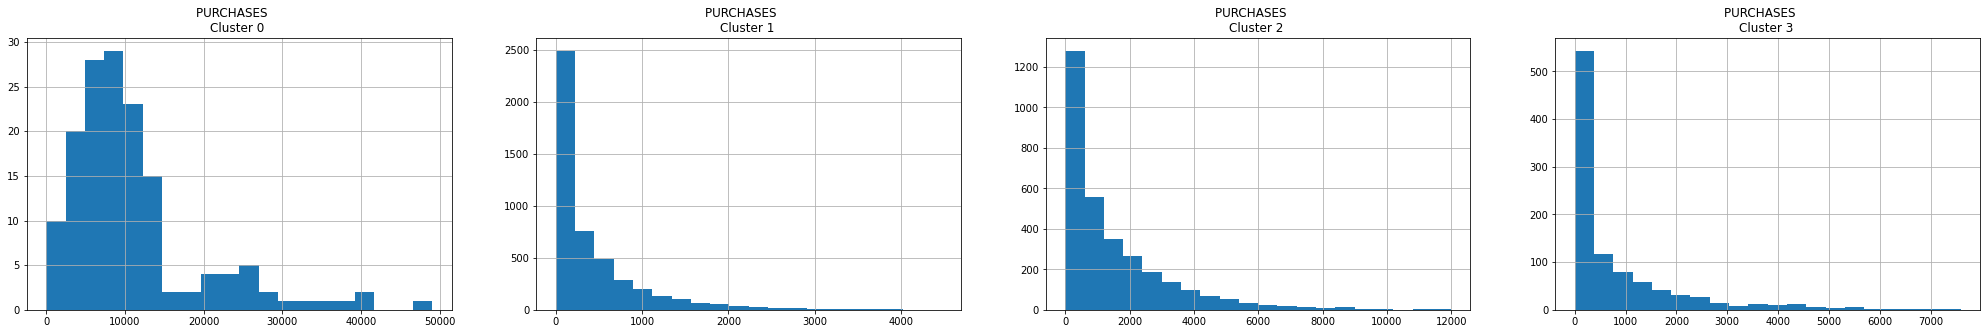

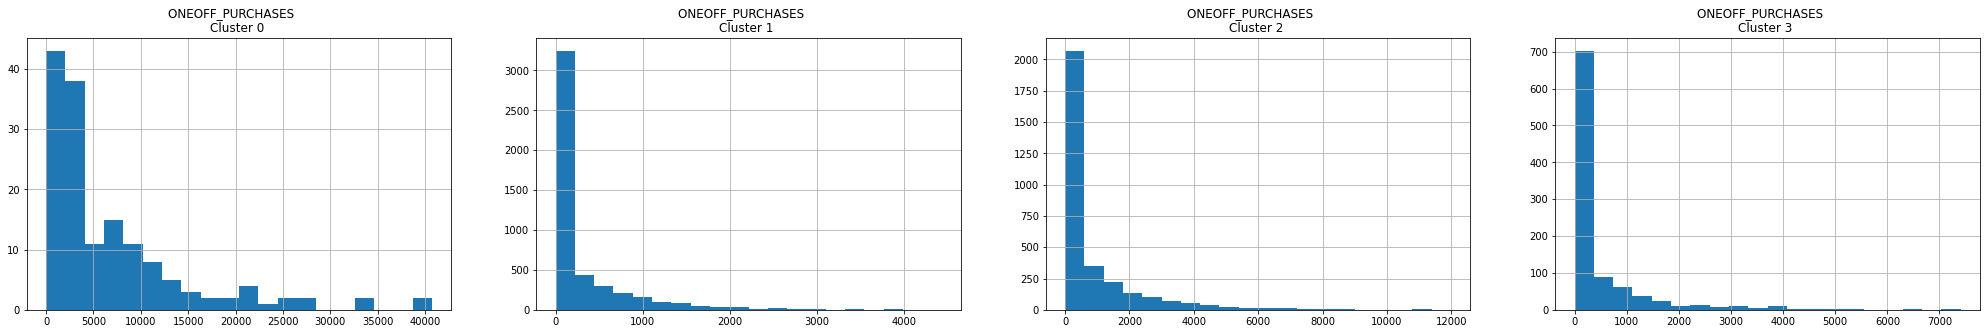

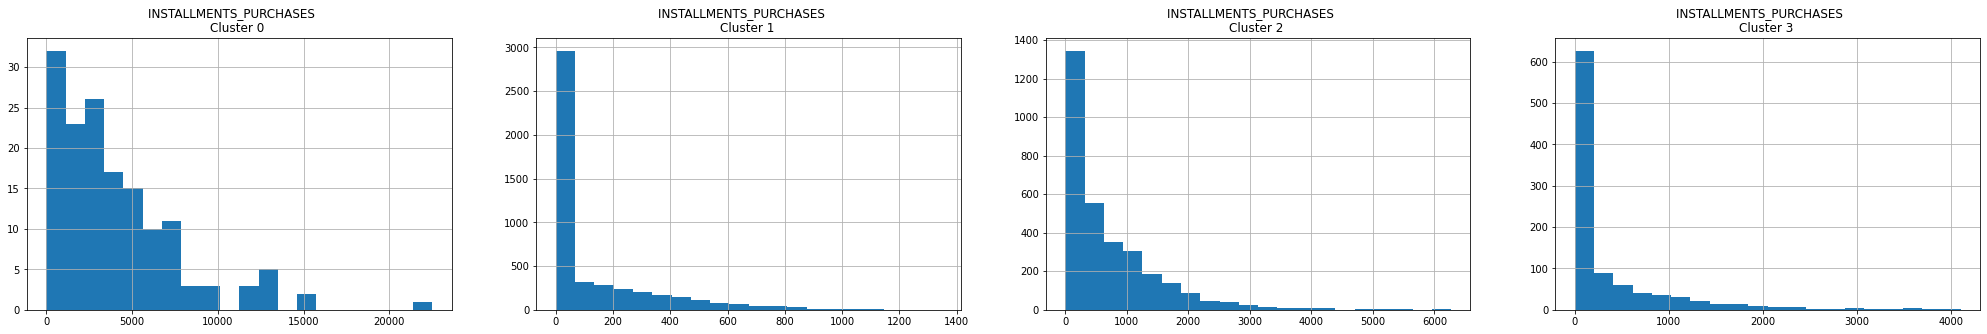

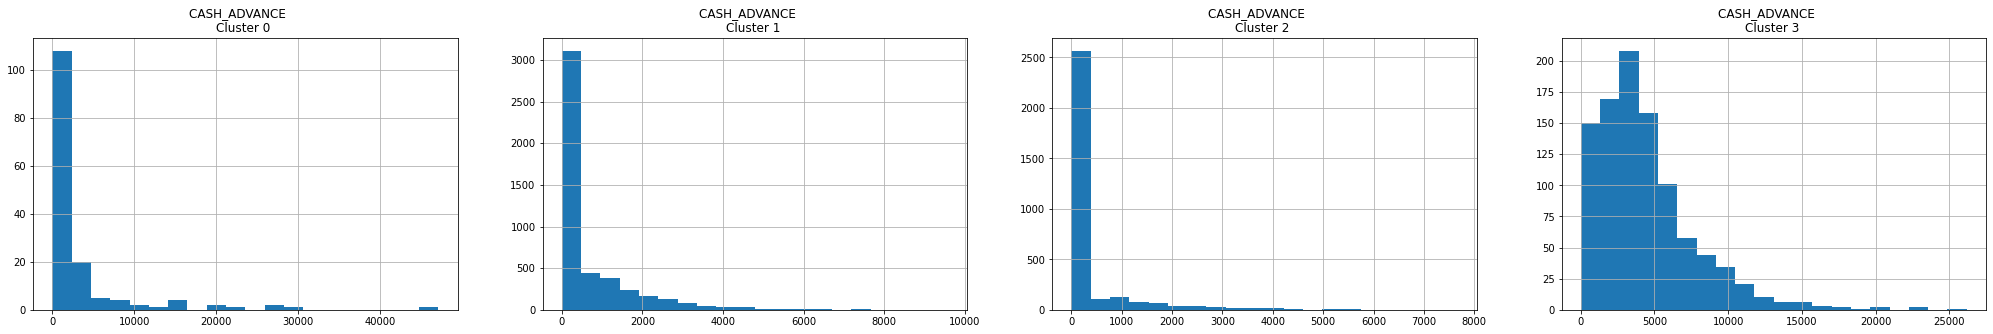

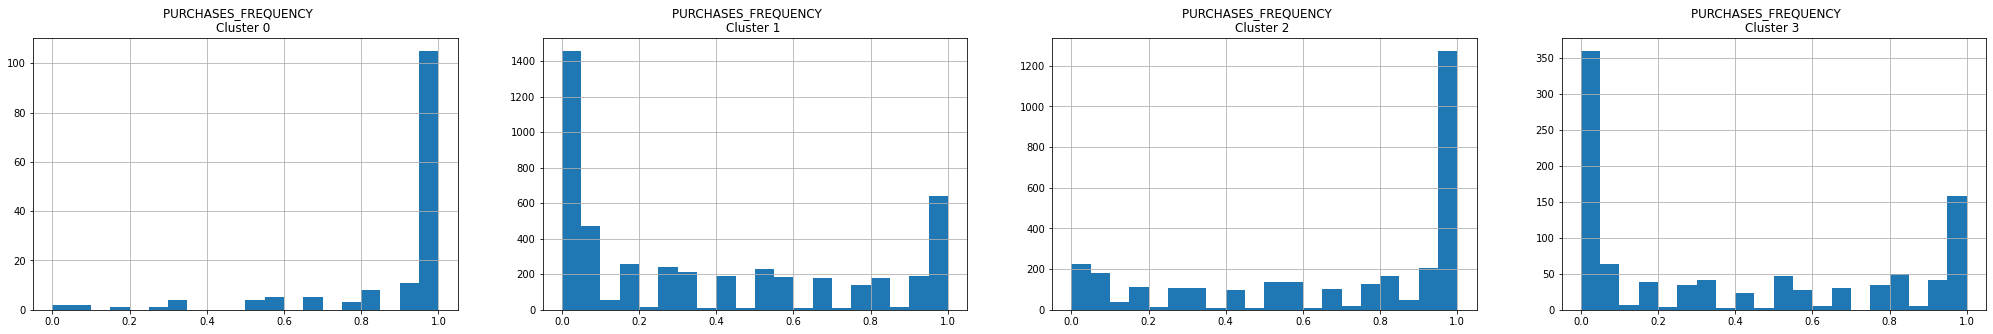

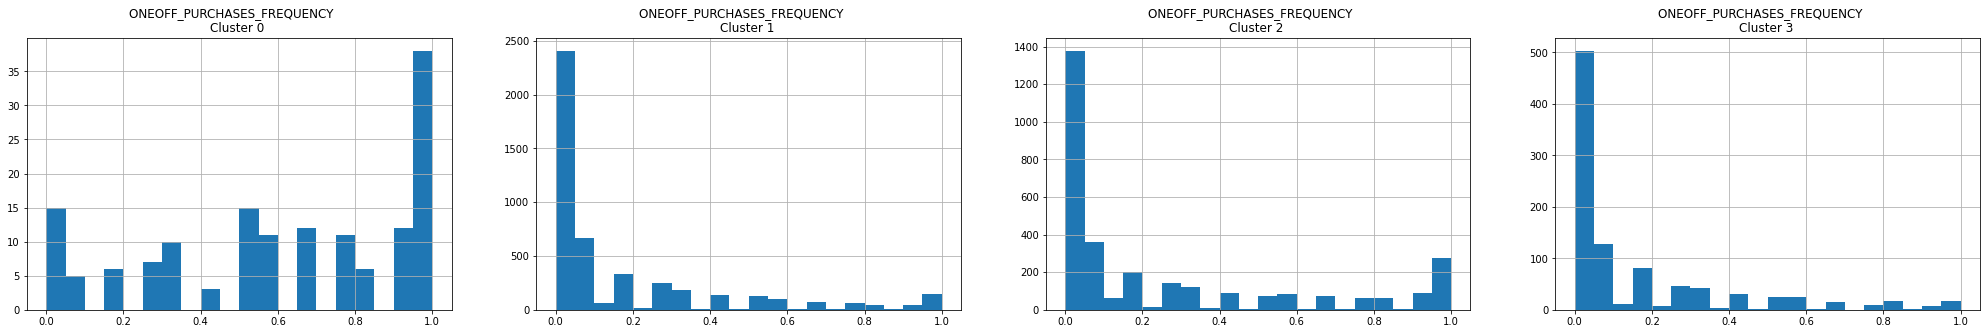

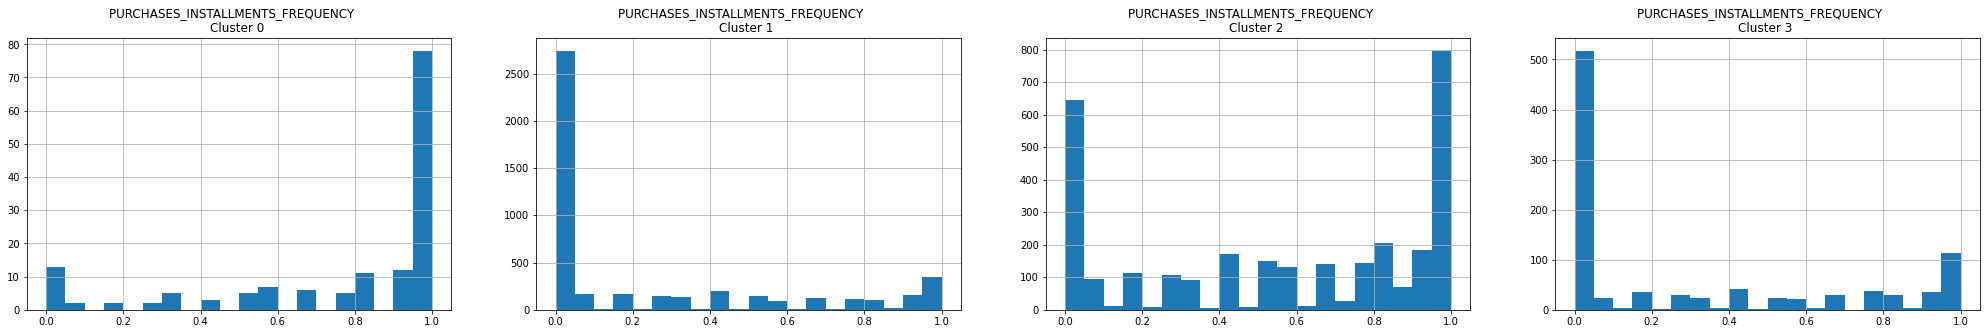

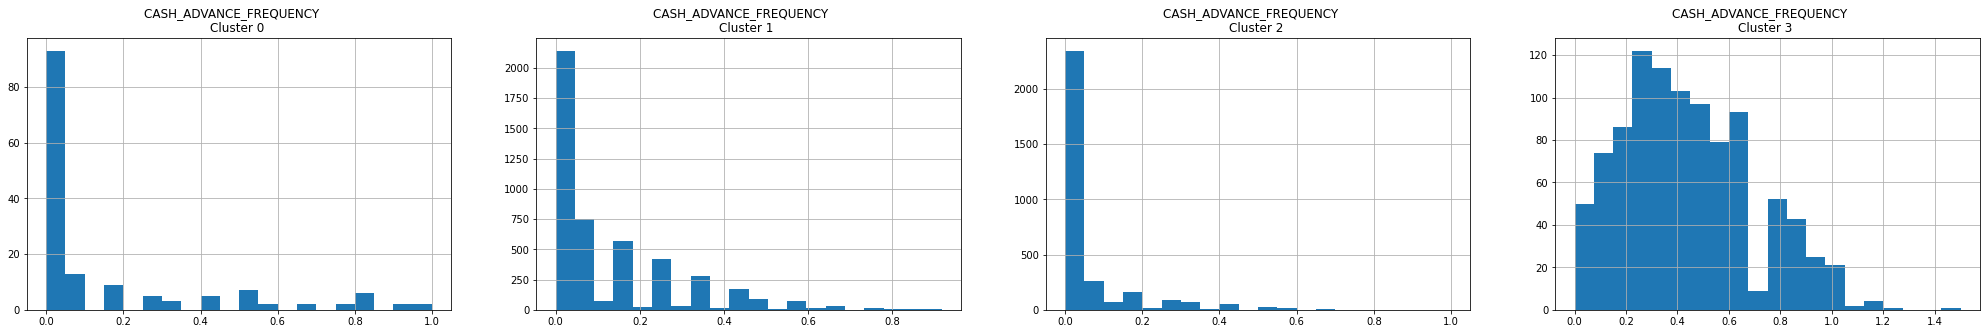

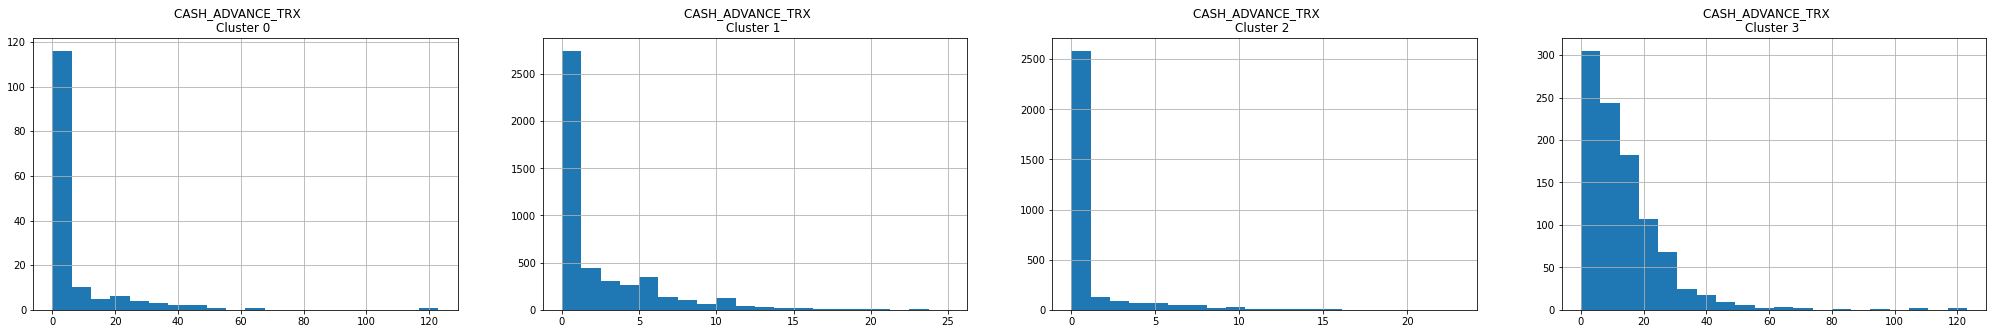

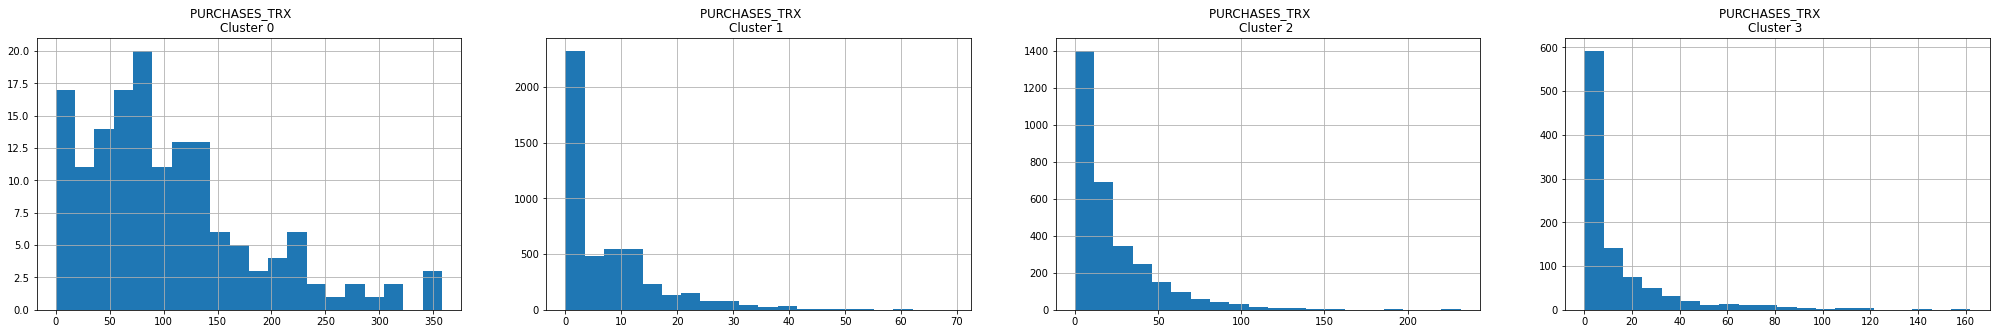

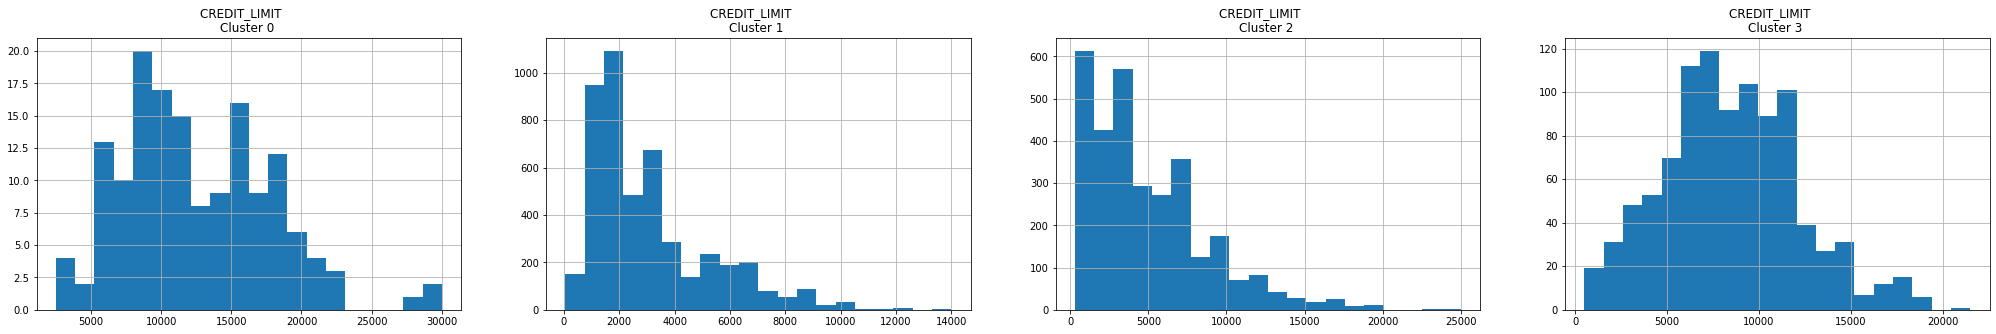

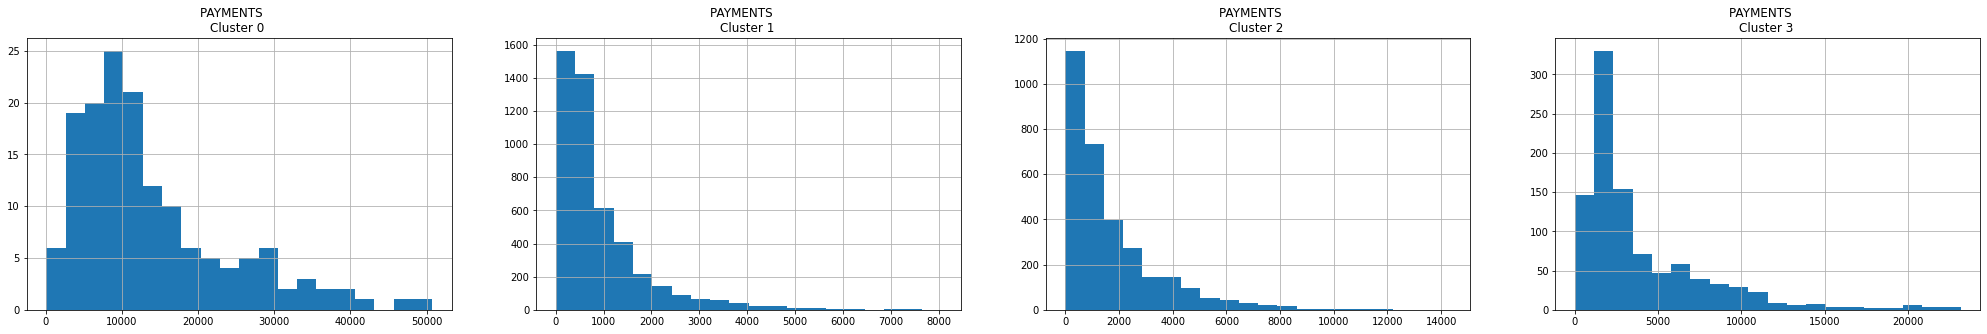

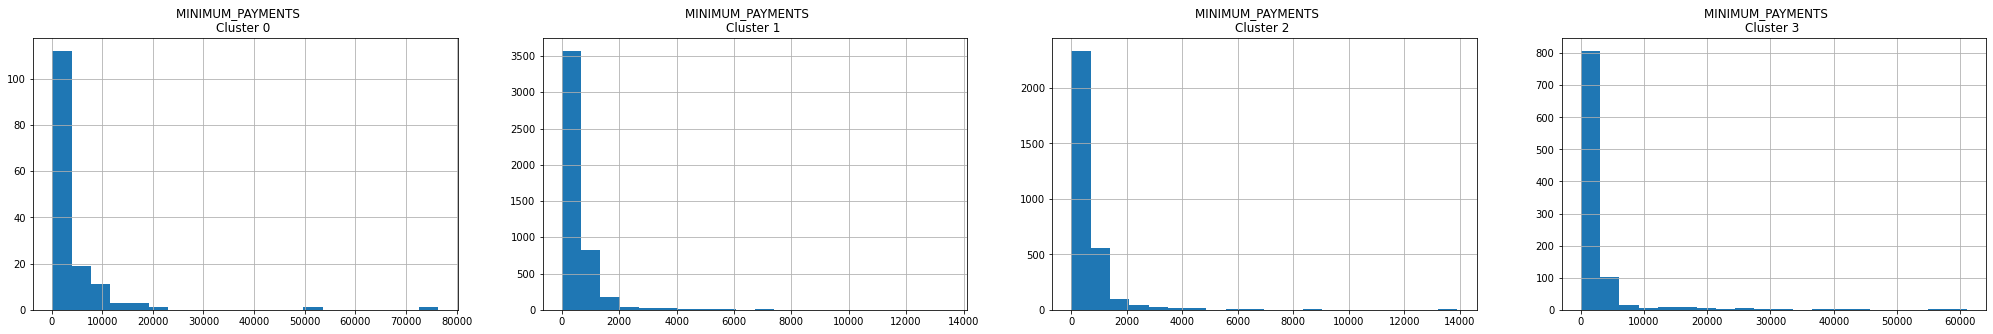

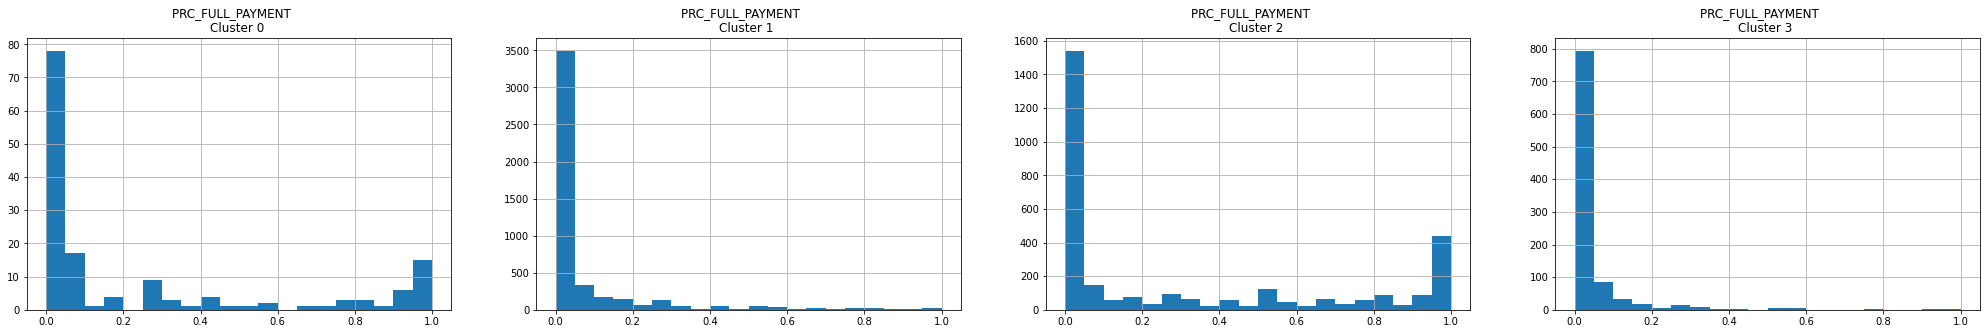

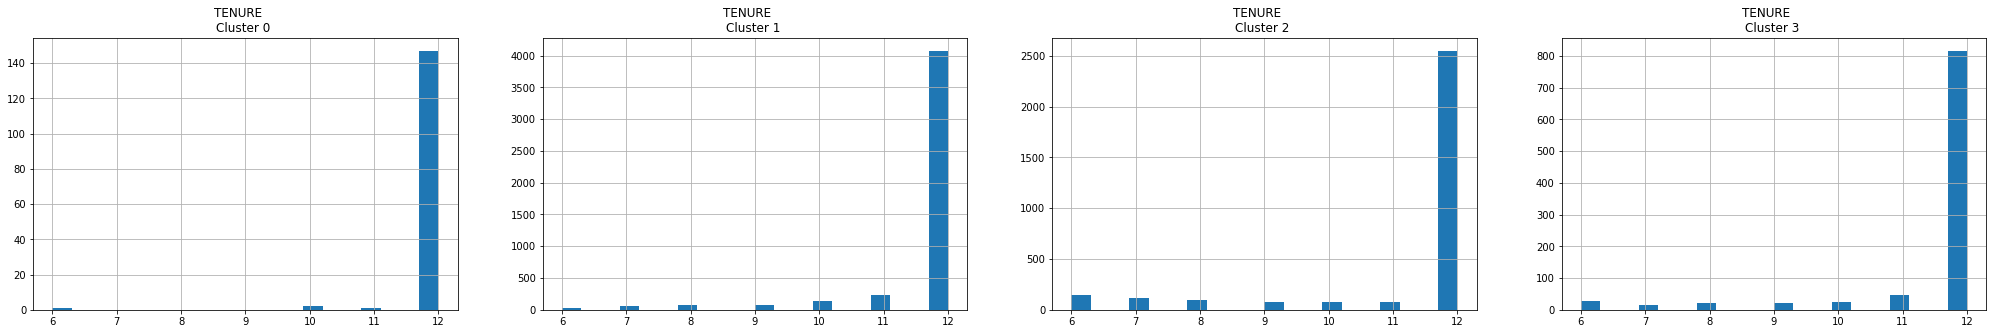

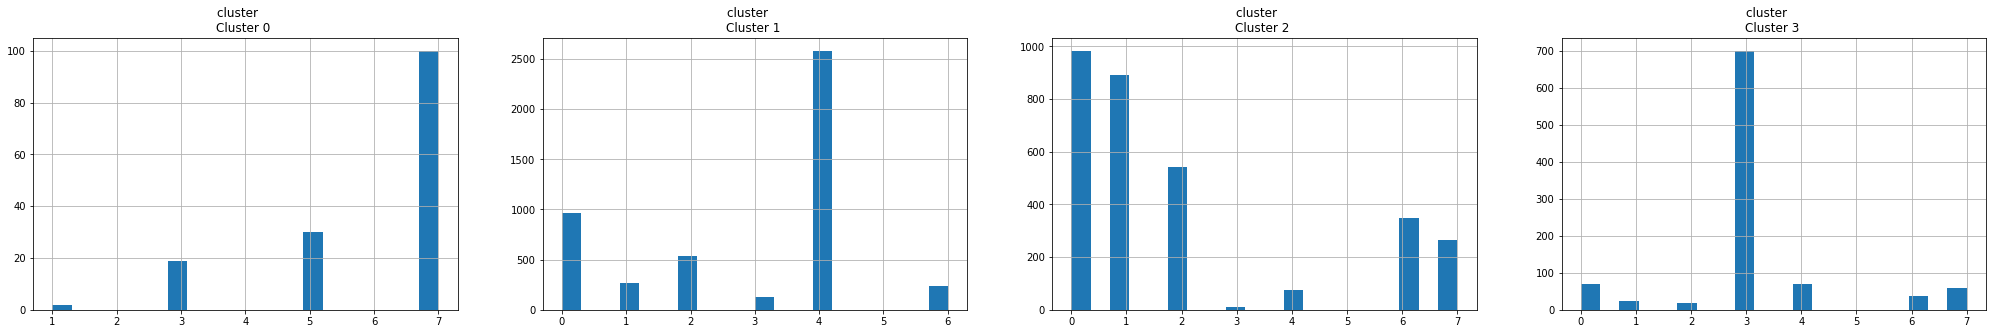

In [55]:
for i in creditcluster_pd.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = creditcluster_df[creditcluster_pd['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [56]:
pca = PCA(n_components=2)
principal_comp_pd = pca.fit_transform(pred)
principal_comp_pd

array([[-1.5421771 , -0.12425479],
       [ 0.23326616, -1.3576026 ],
       [-0.44616878,  0.55675054],
       ...,
       [-0.6748957 ,  0.41244802],
       [-0.63880444, -0.10509251],
       [-0.6421416 ,  0.1595168 ]], dtype=float32)

In [57]:
pca_df_pd = pd.DataFrame(data=principal_comp_pd,columns=['pca1','pca2'])
pca_df_pd = pd.concat([pca_df_pd,pd.DataFrame({'cluster':labels})],axis =1)
pca_df_pd

,pca1,pca2,cluster
0,-1.542177,-0.124255,1
1,0.233266,-1.357603,1
2,-0.446169,0.556751,1
3,-0.004922,0.036161,2
4,-1.892442,-0.131246,1
...,...,...,...
8945,-0.784367,0.661843,2
8946,-0.474311,0.277276,2
8947,-0.674896,0.412448,2
8948,-0.638804,-0.105093,1


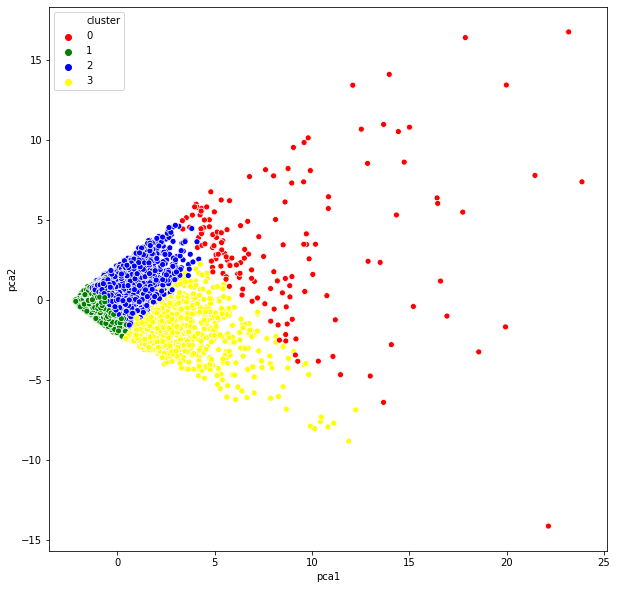

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1',y='pca2',hue ='cluster',data=pca_df_pd,palette=['red','green','blue','yellow'])